In [1]:
from astropy.coordinates import SkyCoord
import numpy as np
from IntegralQuery import SearchQuery, IntegralQuery, Filter, Range
from IntegralPointingClustering import ClusteredQuery
import astropy.io.fits as fits
from astropy.table import Table
from pyspi.utils.response.spi_pointing import construct_sc_matrix, construct_scy
from pyspi.utils.geometry import cart2polar, polar2cart
from datetime import datetime
import matplotlib.pyplot as plt
import math
from numba import njit
from pyspi.utils.function_utils import find_response_version
from pyspi.utils.response.spi_response_data import ResponseDataRMF
from pyspi.utils.response.spi_response import ResponseRMFGenerator
from pyspi.utils.response.spi_drm import SPIDRM
from pyspi.utils.livedets import get_live_dets
from astromodels import Powerlaw, Log_uniform_prior, Uniform_prior, PointSource, SpectralComponent
from chainconsumer import ChainConsumer
import pymultinest
import os
import astropy.time as at

[WARNING ] The naima package is not available. Models that depend on it will not be available
[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.
[WARNING ] The ebltable package is not available. Models that depend on it will not be available
[INFO    ] Starting 3ML!
[WARNING ] no display variable set. using backend for graphics without display (agg)
[WARNING ] ROOT minimizer not available
[WARNING ] PyGMO is not available
[WARNING ] The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)
[WARNING ] Could not import plugin HAWCLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] Could not import plugin FermiLATLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] No fermitools installed
[WARNING ] Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances 

In [2]:
# # Lists of scw_ids for different date ranges

# radius_around_crab = 3

# p = SkyCoord(83.6333, 22.0144, frame="icrs", unit="deg")
# searchquerry = SearchQuery(position=p, radius=f"{radius_around_crab} degree")
# cat = IntegralQuery(searchquerry)

# f1 = Filter(SCW_TYPE="POINTING",
#             TIME=Range("2006-01-01T00:00:00", "2007-01-01T00:00:00"))
# f2 = Filter(SCW_TYPE="POINTING",
#             TIME=Range("2008-07-01T00:00:00", "2009-07-01T00:00:00"))
# f3 = Filter(SCW_TYPE="POINTING",
#             TIME=Range("2011-01-01T00:00:00", "2012-01-01T00:00:00"))
# f4 = Filter(SCW_TYPE="POINTING",
#             TIME=Range("2013-07-01T00:00:00", "2014-07-01T00:00:00"))
# f5 = Filter(SCW_TYPE="POINTING",
#             TIME=Range("2016-01-01T00:00:00", "2017-01-01T00:00:00"))


# scw_ids1 = cat.apply_filter(f1, return_coordinates=True, remove_duplicates=True)
# scw_ids2 = cat.apply_filter(f2, return_coordinates=True, remove_duplicates=True)
# scw_ids3 = cat.apply_filter(f3, return_coordinates=True, remove_duplicates=True)
# scw_ids4 = cat.apply_filter(f4, return_coordinates=True, remove_duplicates=True)
# scw_ids5 = cat.apply_filter(f5, return_coordinates=True, remove_duplicates=True)

In [3]:
# # Clusters of size 2

# min_angle_dif = 2.0
# max_angle_dif = 2.5
# max_time_dif = 0.3

# cq1 = ClusteredQuery(scw_ids1,
#                     angle_weight=0.,
#                     time_weight=1./max_time_dif,
#                     max_distance=1.,
#                     min_ang_distance=min_angle_dif,
#                     max_ang_distance=max_angle_dif,
#                     cluster_size_range = (2,2),
#                     failed_improvements_max = 3,
#                     suboptimal_cluster_size = 1,
#                     close_suboptimal_cluster_size = 1).get_clustered_scw_ids()
# cq2 = ClusteredQuery(scw_ids2,
#                     angle_weight=0.,
#                     time_weight=1./max_time_dif,
#                     max_distance=1.,
#                     min_ang_distance=min_angle_dif,
#                     max_ang_distance=max_angle_dif,
#                     cluster_size_range = (2,2),
#                     failed_improvements_max = 3,
#                     suboptimal_cluster_size = 1,
#                     close_suboptimal_cluster_size = 1).get_clustered_scw_ids()
# cq3 = ClusteredQuery(scw_ids3,
#                     angle_weight=0.,
#                     time_weight=1./max_time_dif,
#                     max_distance=1.,
#                     min_ang_distance=min_angle_dif,
#                     max_ang_distance=max_angle_dif,
#                     cluster_size_range = (2,2),
#                     failed_improvements_max = 3,
#                     suboptimal_cluster_size = 1,
#                     close_suboptimal_cluster_size = 1).get_clustered_scw_ids()
# cq4 = ClusteredQuery(scw_ids4,
#                     angle_weight=0.,
#                     time_weight=1./max_time_dif,
#                     max_distance=1.,
#                     min_ang_distance=min_angle_dif,
#                     max_ang_distance=max_angle_dif,
#                     cluster_size_range = (2,2),
#                     failed_improvements_max = 3,
#                     suboptimal_cluster_size = 1,
#                     close_suboptimal_cluster_size = 1).get_clustered_scw_ids()
# cq5 = ClusteredQuery(scw_ids5,
#                     angle_weight=0.,
#                     time_weight=1./max_time_dif,
#                     max_distance=1.,
#                     min_ang_distance=min_angle_dif,
#                     max_ang_distance=max_angle_dif,
#                     cluster_size_range = (2,2),
#                     failed_improvements_max = 3,
#                     suboptimal_cluster_size = 1,
#                     close_suboptimal_cluster_size = 1).get_clustered_scw_ids()

# cluster1 = cq1[2][0] #['042200080010', '042200150010']
# cluster2 = cq2[2][0] #['072700090010', '072700140010']
# cluster3 = cq3[2][0] #['164400170010', '164400160010']
# cluster4 = cq4[2][0] #['132700090010', '132700140010']
# cluster5 = cq5[2][0] #['164400150010', '164400220010']

# print(cluster1, cluster2, cluster3, cluster4, cluster5)
# # Expect: ['042200080010', '042200150010'] ['072700090010', '072700140010'] 
# # ['101900600010', '101900650010'] ['132700090010', '132700140010'] ['164400150010', '164400220010']

In [4]:
# # Compare pointing coordinates

# # Load all necessary data
# pointing_id1 = cluster1[0]
# pointing_id2 = cluster1[1]

# from astroquery.heasarc import Heasarc, Conf
# integral_query = Heasarc()
# Conf.server.set('https://www.isdc.unige.ch/browse/w3query.pl')
# query_dict = {}
# query_dict["mission"] = "integral_rev3_scw"
# query_dict["position"] = p
# query_dict["radius"] = f"{radius_around_crab} degree"
# query_dict["sortvar"] = "START_DATE"
# query_dict["resultmax"] = 0
# r = integral_query.query_region(**query_dict)
# r.convert_bytestring_to_unicode()
# pa = r.to_pandas()
# pointing_heasarc_info1 = pa[pa["SCW_ID"]==pointing_id1]
# pointing_heasarc_info2 = pa[pa["SCW_ID"]==pointing_id2]


# with fits.open("crab_data/0422/pointing.fits") as file:
#     t = Table.read(file[1])
#     pointing_fits_info1 = t[t["PTID_ISOC"]==pointing_id1[:8]]
#     pointing_fits_info2 = t[t["PTID_ISOC"]==pointing_id2[:8]]


# # Start and End Times
# # See https://www.isdc.unige.ch/integral/support/faq.cgi?DATA-007
# import astropy.time as at
# print(f"Pointing {pointing_id1}")
# print("HEASARC times:") 
# print(f"{pointing_heasarc_info1['START_DATE'].iloc[0]} to {pointing_heasarc_info1['END_DATE'].iloc[0]}")
# print("Fits times:")
# print(f'''{at.Time(f'{pointing_fits_info1["TSTART"][0]+2451544.5}', format='jd').iso[:-4]} to {at.Time(f'{pointing_fits_info1["TSTOP"][0]+2451544.5}', format='jd').iso[:-4]}''')
# print()
# print(f"Pointing {pointing_id2}")
# print("HEASARC times:") 
# print(f"{pointing_heasarc_info2['START_DATE'].iloc[0]} to {pointing_heasarc_info2['END_DATE'].iloc[0]}")
# print("Fits times:")
# print(f'''{at.Time(f'{pointing_fits_info2["TSTART"][0]+2451544.5}', format='jd').iso[:-4]} to {at.Time(f'{pointing_fits_info2["TSTOP"][0]+2451544.5}', format='jd').iso[:-4]}''')

# print()
# print(
#     "The Fits times are in TT, which differ from UTC by 00:01:05. "
#     "If the HEASARC times are in UTC, then SCW 042200150010 matches perfectly. "
#     "Generally speaking, the time difference between the times given by HEASARC and those in the fits files is "
#     "inconsistent, with science windows usually being a little shorter using the fits times. "
#     "When in disagreement, I suppose the times in the fits files are preferable."
# )
# print()
# print()


# # SPI Orientation
# # Get misalignment matrix
# from pyspi.io.package_data import get_path_of_internal_data_dir
# matrix_file = os.path.join(get_path_of_internal_data_dir(), 'inst_misalign_20050328.fits')
# with fits.open(matrix_file) as f:
#     spi_idx = f['GNRL-IROT-MOD'].data['INSTRUMENT'] == 'SPI'
#     matrix_raw = f['GNRL-IROT-MOD'].data['MATRIX'][spi_idx]
#     misalignment_matrix = matrix_raw.reshape((3,3))
#     iv_mm = np.linalg.inv(misalignment_matrix)

# # Calculate INTEGRAL coordinates from SPI coordinates
# rax1, decx1, raz1, decz1 = pointing_fits_info1["RA_SPIX", "DEC_SPIX", "RA_SPIZ", "DEC_SPIZ"].as_array()[0]
# ray1, decy1 = construct_scy(rax1, decx1, raz1, decz1)
# sc_matrix1 = construct_sc_matrix(rax1, decx1, ray1, decy1, raz1, decz1)
# ic_matrix1 = np.dot(iv_mm, sc_matrix1)
# irax1, idecx1 = cart2polar(ic_matrix1[0, : ])

# # Compare results
# print(f"Pointing {pointing_id1}")
# print("HEASARC x-orientation:") 
# print(f"{pointing_heasarc_info1['RA_X'].iloc[0]}, {pointing_heasarc_info1['DEC_X'].iloc[0]}")
# print("Fits x-orientation:")
# print(f"{irax1:.6f}, {idecx1:.6f}")
# print()

# # Repeat for second pointing
# rax2, decx2, raz2, decz2 = pointing_fits_info2["RA_SPIX", "DEC_SPIX", "RA_SPIZ", "DEC_SPIZ"].as_array()[0]
# ray2, decy2 = construct_scy(rax2, decx2, raz2, decz2)
# sc_matrix2 = construct_sc_matrix(rax2, decx2, ray2, decy2, raz2, decz2)
# ic_matrix2 = np.dot(iv_mm, sc_matrix2)
# irax2, idecx2 = cart2polar(ic_matrix2[0, : ])

# print(f"Pointing {pointing_id2}")
# print("HEASARC x-orientation:") 
# print(f"{pointing_heasarc_info2['RA_X'].iloc[0]}, {pointing_heasarc_info2['DEC_X'].iloc[0]}")
# print("Fits x-orientation:")
# print(f"{irax2:.6f}, {idecx2:.6f}")
# print()
# print(
#     "The orientation coordinates in the HEASARC Query thus specify the orientation of INTEGRAL, and not SPI. "
#     "This may prove to be problematic if we wish for precise requirements in the clustering algorithm."
# )

In [7]:
def extract_date_range(path):
    with fits.open(f"{path}/pointing.fits") as file:
        t = Table.read(file[1])
        t1 = at.Time(f'{t["TSTART"][0]+2451544.5}', format='jd')
        t1.format = "isot"
        t2 = at.Time(f'{t["TSTOP"][-1]+2451544.5}', format='jd')
        t2.format = "isot"
    return t1.value, t2.value

def get_scw_ids(path, radius_around_crab, min_time_elapsed=0., print_results=False):
    p = SkyCoord(83.6333, 22.0144, frame="icrs", unit="deg")
    searchquerry = SearchQuery(position=p, radius=f"{radius_around_crab} degree")
    cat = IntegralQuery(searchquerry)

    f = Filter(SCW_TYPE="POINTING",
               TIME=Range(*extract_date_range(path)))
    scw_ids_all = cat.apply_filter(f, return_coordinates=True, remove_duplicates=True)
    
    scw_ids = []
    
    multiple_files = []
    no_files = []
    no_pyspi = []
    
    num_dets = 19
    eb = np.geomspace(18, 2000, 5)
    emod = np.geomspace(18, 2000, 5)
    for scw_id in scw_ids_all:
        good = True
        with fits.open(f"{path}/pointing.fits") as file:
            t = Table.read(file[1])
            index = np.argwhere(t["PTID_ISOC"]==scw_id[0][:8])
                            
            pointing_info = t[index[-1][0]]
        
            t1 = at.Time(f'{pointing_info["TSTART"]+2451544.5}', format='jd').datetime
            time_start = datetime.strftime(t1,'%y%m%d %H%M%S')
            
            if len(index) < 1:
                no_files.append(scw_id)
                good = False
                
            elif len(index) > 1:
                multiple_files.append(scw_id)
                good = False
                
            with fits.open(f"{path}/dead_time.fits") as file2:
                t2 = Table.read(file2[1])
                
                time_elapsed = np.zeros(num_dets)
                
                for i in range(num_dets):
                    for j in index:
                        time_elapsed[i] += t2["LIVETIME"][j[0]*85 + i]
                            
            dets = get_live_dets(time=time_start, event_types=["single"])
                            
            if not np.amin(time_elapsed[dets]) > min_time_elapsed:
                good = False
        
        try:
            version1 = find_response_version(time_start)
            rsp_base = ResponseDataRMF.from_version(version1)
            rsp1 = ResponseRMFGenerator.from_time(time_start, dets[0], eb, emod, rsp_base)
        except:
            no_pyspi.append(scw_id)
            good = False
            
        if good:
            scw_ids.append(i)
            
    if print_results:
        print("Multiple Files:")
        print(multiple_files)
        print("No Files:")
        print(no_files)
        print("No PySpi:")
        print(no_pyspi)
    
    return scw_ids_all

get_scw_ids("crab_data/1327", 3, print_results=True)
                
    
def extract_relevant_information(path, p_id):
    num_dets = 19
    with fits.open(f"{path}/pointing.fits") as file:
        t = Table.read(file[1])
        index = np.argwhere(t["PTID_ISOC"]==p_id[:8])
        
        if len(index) < 1:
            raise Exception(f"{p_id} not found")

        pointing_info = t[index[-1][0]]
        
        t1 = at.Time(f'{pointing_info["TSTART"]+2451544.5}', format='jd').datetime
        time_start = datetime.strftime(t1,'%y%m%d %H%M%S')
            
    with fits.open(f"{path}/dead_time.fits") as file:
        t = Table.read(file[1])
        
        time_elapsed = np.zeros(num_dets)
        
        for i in range(num_dets):
            for j in index:
                time_elapsed[i] += t["LIVETIME"][j[0]*85 + i]
        
    with fits.open(f"{path}/energy_boundaries.fits") as file:
        t = Table.read(file[1])
        
        energy_bins = np.append(t["E_MIN"], t["E_MAX"][-1])
    
    with fits.open(f"{path}/evts_det_spec.fits") as file:
        t = Table.read(file[1])
        
        counts = np.zeros((num_dets, len(energy_bins)-1))
        for i in range(num_dets):
            for j in index:
                counts[i, : ] += t["COUNTS"][j[0]*85 + i]

    return time_start, time_elapsed, energy_bins, counts


def rebin_data_full(energy_bins, counts, min_counts, max_num_bins = None):
    max_num_bins = max_num_bins if max_num_bins else len(energy_bins)
    min_num_bins = 1
    
    finished = False
    
    while not finished:
        num_bins = round((max_num_bins + min_num_bins) / 2)
        
        if num_bins == max_num_bins or num_bins == min_num_bins:
            num_bins = min_num_bins
            finished = True
        
        new_bins = np.geomspace(energy_bins[0], energy_bins[-1], num_bins+1)
        
        new_counts = rebin_data(energy_bins, counts, new_bins)
        
        if np.amin(new_counts) < min_counts:
            max_num_bins = num_bins
        else:
            min_num_bins = num_bins
            
    return new_bins, new_counts
    
@njit
def rebin_data(energy_bins, counts, new_energy_bins):
    new_counts = np.zeros((counts.shape[0], len(new_energy_bins)-1))
    
    def enter_bins_smaller(i, bin):
        split = ((energy_bins[bin+1] - max(energy_bins[bin], new_energy_bins[i]))
                 / (energy_bins[bin+1] - energy_bins[bin]))
        new_counts[ : , i] += counts[ : , bin] * split
    
    bin = 0
    length = len(energy_bins) - 1
    for i in range(len(new_energy_bins)-1):
        
        while new_energy_bins[i+1] > energy_bins[bin+1]:
            enter_bins_smaller(i, bin)
            bin += 1
        
        if new_energy_bins[i+1] == energy_bins[bin+1]:
            enter_bins_smaller(i, bin)
            bin += 1
        
        else:
            split = ((min(energy_bins[bin+1], new_energy_bins[i+1]) - max(energy_bins[bin], new_energy_bins[i]))
                     / (energy_bins[bin+1] - energy_bins[bin]))
            new_counts[ : , i] += counts[ : , bin] * split
            
    return new_counts

Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid be

In [6]:
def fit_crab_2_pointings(pointings, show_plot=False, return_quality=False):
    # example: pointings = (("crab_data/0422", "042200080010", '042200150010'),
    #                       ("crab_data/1019", "101900600010", '101900650010'))
    
    emod = np.geomspace(18,3000,50)
    counts = []
    dets = []
    resp_mats = []
    t_elapsed = []
    
    ra_crab, dec_crab = 83.6333, 22.0144
    crab_K, crab_piv, crab_index = 9.3, 1, -2.08 #K:6.44*10**-4
    fit_piv = 40
    fit_K = crab_K * (fit_piv / crab_piv)**crab_index
    min_counts = 5
    max_num_bins = 120
    
    for count, pair in enumerate(pointings):
        time_start1, time_elapsed1, energy_bins1, counts_f1 = extract_relevant_information(pair[0], pair[1])
        time_start2, time_elapsed2, energy_bins2, counts_f2 = extract_relevant_information(pair[0], pair[2])
        
        version1 = find_response_version(time_start1)
        version2 = find_response_version(time_start2)
        assert version1 == version2, f"Response versions are not equal for {pair[1]} and {pair[2]}"
        
        dets1 = get_live_dets(time=time_start1, event_types=["single"])
        dets2 = get_live_dets(time=time_start2, event_types=["single"])
        assert np.array_equal(dets1, dets2), f"Active detectors are not the same for {pair[1]} and {pair[2]}"
        dets.append(dets1)
        
        t_elapsed.append((time_elapsed1[dets1], time_elapsed2[dets1]))
        
        assert np.array_equal(energy_bins1, energy_bins2), f"Energy bins are not the same for {pair[1]} and {pair[2]}"
        eb, c = rebin_data_full(energy_bins1,
                                np.append(counts_f1[dets1], counts_f2[dets1], axis=0),
                                min_counts,
                                max_num_bins)
        counts.append((c[:len(dets1)], c[len(dets1):]))
        
        rsp_base = ResponseDataRMF.from_version(version1)
        sds1 = np.array([])
        sds2 = np.array([])
        for d in dets1:
            rsp1 = ResponseRMFGenerator.from_time(time_start1, d, eb, emod, rsp_base)
            sd1 = SPIDRM(rsp1, ra_crab, dec_crab)
            sds1 = np.append(sds1, sd1.matrix.T)
            rsp2 = ResponseRMFGenerator.from_time(time_start2, d, eb, emod, rsp_base)
            sd2 = SPIDRM(rsp2, ra_crab, dec_crab)
            sds2 = np.append(sds2, sd2.matrix.T)
        resp_mats.append((
            sds1.reshape((len(dets1), len(emod)-1, len(eb)-1)),
            sds2.reshape((len(dets1), len(emod)-1, len(eb)-1)),
        ))
        
    counts = tuple(counts)
    dets = tuple(dets)
    resp_mats = tuple(resp_mats)
    t_elapsed = tuple(t_elapsed)
    
    
    pl = Powerlaw()
    pl.index = crab_index
    pl.K = fit_K
    pl.piv = fit_piv
    pl.K.prior = Log_uniform_prior(lower_bound=1e-6, upper_bound=1e-0)
    pl.index.prior = Uniform_prior(lower_bound=-4, upper_bound=0)
    component1 = SpectralComponent('pl',shape=pl)
    ps = PointSource('plline',ra=ra_crab, dec=dec_crab, components=[component1])
    
    @njit
    def bmaxba(m1, m2, t1, t2, C1, C2):
        first = C1+C2-(m1+m2)*(t1+t2)
        root = (C1+C2+(m1-m2)*(t1+t2))**2-4*C1*(m1-m2)*(t1+t2)
        res = (first+np.sqrt(root))/(2*(t1+t2))
        if res < 0:
            return 0
        return res
    
    @njit
    def logLcore(spec_binned):
        logL=0
        for k in range(len(pointings)):
            for j in range(len(dets[k])):
                m1 = np.dot(spec_binned[k], resp_mats[k][0][j])
                m2 = np.dot(spec_binned[k], resp_mats[k][1][j])
                for i in range(len(m1)):
                    bm = bmaxba(m1[i], m2[i], t_elapsed[k][0][j], t_elapsed[k][1][j], counts[k][0][j, i], counts[k][1][j, i])
                    logL += (counts[k][0][j, i]*math.log(t_elapsed[k][0][j]*(m1[i]+bm))+
                            counts[k][1][j, i]*math.log(t_elapsed[k][1][j]*(m2[i]+bm))-
                            t_elapsed[k][0][j]*(m1[i]+bm)-
                            t_elapsed[k][1][j]*(m2[i]+bm))
        return logL

    def logLba_mult(trial_values, ndim=None, params=None):
        pl.index = trial_values[1]
        pl.K = trial_values[0]
        spec_binned = np.zeros((len(pointings), len(emod)-1))
        for i in range(len(pointings)):
            spec = pl(emod)
            spec_binned[i,:] = (emod[1:]-emod[:-1])*(spec[:-1]+spec[1:])/2
        return logLcore(spec_binned)
    
    def prior(params, ndim=None, nparams=None):
        for i, (parameter_name, parameter) in enumerate(
            ps.free_parameters.items()
        ):
            try:
                params[i] = parameter.prior.from_unit_cube(params[i])

            except AttributeError:
                raise RuntimeError(
                    "The prior you are trying to use for parameter %s is "
                    "not compatible with sampling from a unitcube"
                    % parameter_name
                )

    if not os.path.exists("./chains"):
        os.mkdir("chains")
    sampler = pymultinest.run(
                        logLba_mult, prior, 2, 2, n_live_points=800, resume=False, verbose=True
                    )
    if show_plot or return_quality:
        %matplotlib inline
        def loadtxt2d(intext):
                try:
                    return np.loadtxt(intext, ndmin=2)
                except:
                    return np.loadtxt(intext)

        c = ChainConsumer()
        chain = loadtxt2d('./chains/1-post_equal_weights.dat')
        #c.add_chain(chain, parameters=['K', 'index', 'F', 'mu','sigma', '$z$'], name='yeah')
        c.add_chain(chain, parameters=['K', 'index', '$z$'], name='fit')
        
        if show_plot:
            c.plotter.plot(filename="crab_parameter_fit.pdf", 
                        parameters=['K', 'index'],
                        truth=[fit_K, crab_index],
                        log_scales=[]);
        
        if return_quality:
            summary = c.analysis.get_summary(parameters=['K', 'index'])
            cov = c.analysis.get_covariance(parameters=['K', 'index'])
            true_val = [fit_K, crab_index]
            return summary, cov, true_val

In [7]:
def create_pair_clusters(paths, min_angle_dif, max_angle_dif, max_time_dif, radius_around_crab, min_time_elapsed=None):
    output = []
    for path in paths:
        scw_ids = get_scw_ids(path, radius_around_crab, min_time_elapsed)
        cq = ClusteredQuery(scw_ids,
                            angle_weight=0.,
                            time_weight=1./max_time_dif,
                            max_distance=1.,
                            min_ang_distance=min_angle_dif,
                            max_ang_distance=max_angle_dif,
                            cluster_size_range = (2,2),
                            failed_improvements_max = 3,
                            suboptimal_cluster_size = 1,
                            close_suboptimal_cluster_size = 1).get_clustered_scw_ids()
        for i, pair in enumerate(cq[2]):
            output.append((path, pair[0], pair[1]))
    return tuple(output)

# def create_pair_clusters_mixed(paths, min_angle_dif, max_angle_dif, angle_dif_range, max_time_dif):
#     assert max_angle_dif - min_angle_dif > angle_dif_range, "angle_dif_range is too large"
#     output = []
#     for path in paths:
#         scw_ids = get_scw_ids(path)
#         done = False
#         while not done:
#             cq = ClusteredQuery(scw_ids,
#                                 angle_weight=0.,
#                                 time_weight=1./max_time_dif,
#                                 max_distance=1.,
#                                 min_ang_distance=min_angle_dif,
#                                 max_ang_distance=max_angle_dif,
#                                 cluster_size_range = (2,2),
#                                 failed_improvements_max = 3,
#                                 suboptimal_cluster_size = 1,
#                                 close_suboptimal_cluster_size = 1).get_clustered_scw_ids()
            
#             for i, pair in enumerate(cq[2]):
#                 output.append((path, pair[0], pair[1]))
#     return tuple(output)

In [8]:
def calc_fit_quality(summary, cov, true_val):
    fit_val = np.array([summary["K"][1], summary["index"][1]])
    true_val = np.array(true_val)
    fit_cov = cov[1]
    dif = fit_val - true_val
    
    abs_distance = np.linalg.norm(dif / true_val)
    rel_distance = np.sqrt(
        np.linalg.multi_dot([dif, np.linalg.inv(fit_cov), dif])
    )
    return abs_distance, rel_distance

def orbit_quality_test(path):
    radius_around_crab = 5
    min_angle_dif = 0.5
    max_angle_dif = 5
    max_time_dif = 0.3
    min_time_elapsed = 600
    
    pairs = create_pair_clusters((path,), min_angle_dif, max_angle_dif, max_time_dif, radius_around_crab, min_time_elapsed)
    
    qualities = []
    values = []
    for pair in pairs:
        quality = fit_crab_2_pointings((pair,), return_quality=True)
        qualities.append(quality)
        values.append([*calc_fit_quality(*quality)])
    values = np.array(values)

    n, xb, yb, _ = plt.hist2d(values[:,0], values[:,1], (50, 50))
    plt.colorbar()
    plt.xlabel("Relative Distance to True Values")
    plt.ylabel("Standard Deviations to True Values")
        
    


Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.997653
Replacements:                                850
Total Samples:                               852
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.999413
Acceptance Rate:                        0.994475


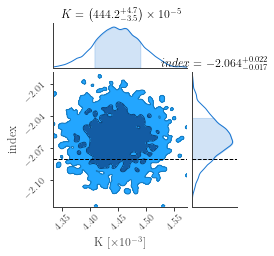

In [9]:
pointings = (("crab_data/0422", "042200080010", '042200150010'),
             ("crab_data/0727", '072700090010', '072700140010'),
            #  ("crab_data/1019", "101900600010", '101900650010'),
             ("crab_data/1327", '132700090010', '132700140010'),
             ("crab_data/1644", '164400150010', '164400220010'))

fit_crab_2_pointings(pointings, show_plot=True)

Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        1.000000
Replacements:                                850
Total Samples:                               850
Nested Sampling ln(Z):            7457482.330814
Importance Nested Sampling ln(Z): ************** +/-  0.999292
Acceptance Rate:                        0.991189
Replacements:                                900
Total Samples:                               908
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.999329
Acceptance Rate:                        0.976362
Replacements:  

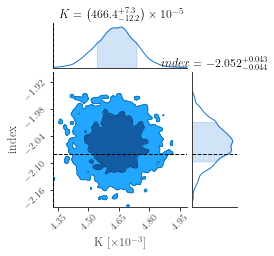

In [10]:
pointings = (("crab_data/0422", "042200080010", '042200150010'),)
fit_crab_2_pointings(pointings, show_plot=True)

Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.997653
Replacements:                                850
Total Samples:                               852
Nested Sampling ln(Z):            5866009.934834
Importance Nested Sampling ln(Z): ************** +/-  0.991414
Acceptance Rate:                        0.995575
Replacements:                                900
Total Samples:                               904
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.991449
Acceptance Rate:                        0.990615
Replacements:            

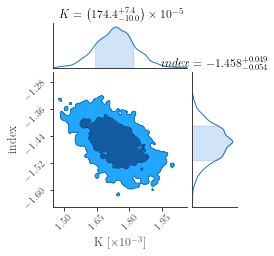

In [11]:
pointings = (("crab_data/1019", "101900600010", '101900650010'),)
fit_crab_2_pointings(pointings, show_plot=True)

Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        1.000000
Replacements:                                850
Total Samples:                               850
Nested Sampling ln(Z):            3410616.526635
Importance Nested Sampling ln(Z): ************** +/-  0.957537
Acceptance Rate:                        0.995575
Replacements:                                900
Total Samples:                               904
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.957574
Acceptance Rate:                        0.981405
Replacements:            

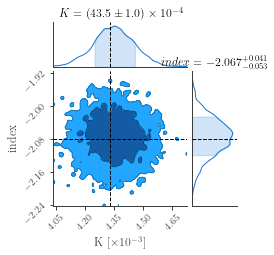

In [12]:
pointings = (("crab_data/1644", '164400150010', '164400220010'),)
fit_crab_2_pointings(pointings, show_plot=True)

Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        1.000000
Replacements:                                850
Total Samples:                               850
Nested Sampling ln(Z):            3730100.543262
Importance Nested Sampling ln(Z): ************** +/-  0.999412
Acceptance Rate:                        0.995575
Replacements:                                900
Total Samples:                               904
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.999447
Acceptance Rate:                        0.978373
Replacements:  

Acceptance Rate:                        0.800778
Replacements:                               8650
Total Samples:                             10802
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.016532
Acceptance Rate:                        0.801326
Replacements:                               8700
Total Samples:                             10857
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.016290
Acceptance Rate:                        0.801709
Replacements:                               8725
Total Samples:                             10883
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.016181
 ln(ev)=   15972045.991765104      +/-   9.6163990560299853E-002
 Total Likelihood Evaluations:        10883
 Sampling finished. Exiting MultiNest
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:5

Acceptance Rate:                        0.780762
Replacements:                               8750
Total Samples:                             11207
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.016262
Acceptance Rate:                        0.781528
Replacements:                               8800
Total Samples:                             11260
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.016015
Acceptance Rate:                        0.781733
Replacements:                               8850
Total Samples:                             11321
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015748
Acceptance Rate:                        0.781476
Replacements:                               8876
Total Samples:                             11358
Nested Sampling ln(Z):            **************
Importance Nested Sampling 

Acceptance Rate:                        0.716488
Replacements:                               8600
Total Samples:                             12003
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015788
Acceptance Rate:                        0.716534
Replacements:                               8650
Total Samples:                             12072
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015473
Acceptance Rate:                        0.716521
Replacements:                               8700
Total Samples:                             12142
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015181
Acceptance Rate:                        0.716505
Replacements:                               8717
Total Samples:                             12166
Nested Sampling ln(Z):            **************
Importance Nested Sampling 

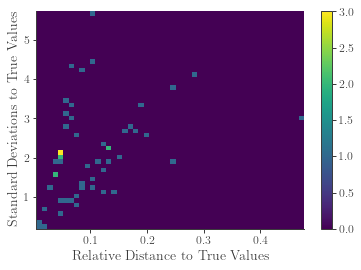

In [13]:
orbit_quality_test("crab_data/0422")

Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
AFS data access did not work. I will try the ISDC data archive.
AFS data access did not work. I will try the ISDC data archive.
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.998825
Replacements:                                850
Total Samples:                               851
Nested Sampling ln(Z):            9612120.401593
Importance Nested Sampling ln(Z): ************** +/-  0.999322
Acceptance Rate:                        0.992282
Replacements:                                900
Total Samples:                               907
Nested Sampling ln(Z):            **************

 ln(ev)=   20937388.295581490      +/-   9.4874414428223475E-002
 Total Likelihood Evaluations:        11738
 Sampling finished. Exiting MultiNest
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
AFS data access did not work. I will try the ISDC data archive.
AFS data access did not work. I will try the ISDC data archive.
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        1.000000
Replacements:                                850
Total Samples:                               850
Nested Sampling ln(Z):            9115180.617185
Importance Nested Sampling ln(Z): ************** +/-  0.999412
Acceptance Rate:                        0.995575

Acceptance Rate:                        0.749349
Replacements:                               9208
Total Samples:                             12288
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015264
 ln(ev)=   21329524.417921871      +/-  0.10115103180125297     
 Total Likelihood Evaluations:        12288
 Sampling finished. Exiting MultiNest
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
AFS data access did not work. I will try the ISDC data archive.
AFS data access did not work. I will try the ISDC data archive.
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.997653

Acceptance Rate:                        0.741725
Replacements:                               8650
Total Samples:                             11662
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015279
Acceptance Rate:                        0.741784
Replacements:                               8690
Total Samples:                             11715
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015065
 ln(ev)=   21402650.182487760      +/-  0.10087715993996405     
 Total Likelihood Evaluations:        11715
 Sampling finished. Exiting MultiNest
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
AFS data access did not work. I will try the ISDC data archive.
AFS data access did not work. I will try the ISDC data archive.
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson

Acceptance Rate:                        0.796429
Replacements:                               9100
Total Samples:                             11426
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.016570
Acceptance Rate:                        0.796622
Replacements:                               9150
Total Samples:                             11486
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.016308
Acceptance Rate:                        0.797020
Replacements:                               9200
Total Samples:                             11543
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.016083
Acceptance Rate:                        0.797020
Replacements:                               9200
Total Samples:                             11543
Nested Sampling ln(Z):            **************
Importance Nested Sampling 

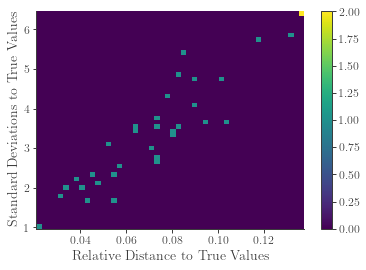

In [14]:
orbit_quality_test("crab_data/0727")

Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.998825
Replacements:                                850
Total Samples:                               851
Nested Sampling ln(Z):            7593030.934181
Importance Nested Sampling ln(Z): ************** +/-  0.983410
Acceptance Rate:                        0.992282
Replacements:                                900
Total Samples:                               907
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.983447
Acceptance Rate:                        0.983437
Replacements:            

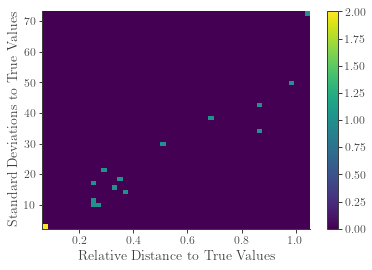

In [15]:
orbit_quality_test("crab_data/1019")

In [16]:
orbit_quality_test("crab_data/1327")

Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.997653
Replacements:                                850
Total Samples:                               852
Nested Sampling ln(Z):            1134157.669168
Importance Nested Sampling ln(Z): ************** +/-  0.901219
Acceptance Rate:                        0.994475
Replacements:                                900
Total Samples:                               905
Nested Sampling ln(Z):            8673072.885698
Importance Nested Sampling ln(Z): ************** +/-  0.999447
Acceptance Rate:                        0.985477
Replacements:            

Acceptance Rate:                        0.714655
Replacements:                               8300
Total Samples:                             11614
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015433
Acceptance Rate:                        0.715081
Replacements:                               8350
Total Samples:                             11677
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015150
Acceptance Rate:                        0.715663
Replacements:                               8389
Total Samples:                             11722
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.014962
 ln(ev)=   15712676.041568032      +/-   9.5874549559744421E-002
 Total Likelihood Evaluations:        11722
 Sampling finished. Exiting MultiNest
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/D

Exception: No pointing id contains this time...

Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
AFS data access did not work. I will try the ISDC data archive.
AFS data access did not work. I will try the ISDC data archive.
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.998825
Replacements:                                850
Total Samples:                               851
Nested Sampling ln(Z):            8564886.964093
Importance Nested Sampling ln(Z): ************** +/-  0.743698
Acceptance Rate:                        0.995575
Replacements:                                900
Total Samples:                               904
Nested Sampling ln(Z):            **************
Importanc

Acceptance Rate:                        0.784583
Replacements:                               9018
Total Samples:                             11494
Nested Sampling ln(Z):            **************
Importance Nested Sampling ln(Z): ************** +/-  0.015805
 ln(ev)=   15011988.812993275      +/-  0.10276723639138885     
 Total Likelihood Evaluations:        11494
 Sampling finished. Exiting MultiNest
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)
AFS data access did not work. I will try the ISDC data archive.
AFS data access did not work. I will try the ISDC data archive.
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  800
 dimensionality =    2
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.997653
Replaceme

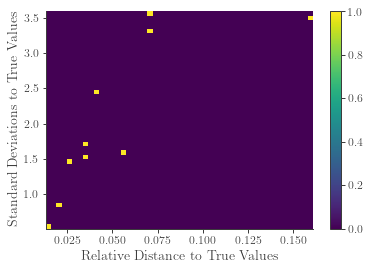

In [17]:
orbit_quality_test("crab_data/1644")

Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that 

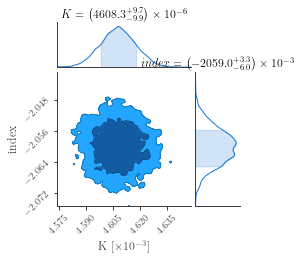

In [19]:
fit_crab_2_pointings(create_pair_clusters(("crab_data/0422", "crab_data/0727", "crab_data/1644"), 1.5, 4., 0.2, 5, 600), show_plot=True)